# Исследование надежности заемщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования**

* Оценить влияние семейного положения и количества детей на факт погашения кредита в срок

**Ход исследования**

1. Откройте таблицу и изучите общую информацию о данных 
2. Предобработка данных
3. Исследуйте данные и ответьте на вопросы
4. Общий вывод

**Содержание**<a id='toc0_'></a>    
1. [Откройте таблицу и изучите общую информацию о данных](#toc1_)    
2. [Предобработка данных](#toc2_)    
2.1. [Удаление пропусков](#toc2_1_)    
2.2. [Обработка аномальных значений](#toc2_2_)    
2.3. [Удаление пропусков (продолжение)](#toc2_3_)    
2.4. [Изменение типов данных](#toc2_4_)    
2.5. [Обработка дубликатов](#toc2_5_)    
2.6. [Категоризация данных](#toc2_6_)    
3. [Исследуйте данные и ответьте на вопросы](#toc3_)    
3.1. [Есть ли зависимость между количеством детей и возвратом кредита в срок?](#toc3_1_)    
3.2. [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#toc3_2_)    
3.3. [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#toc3_3_)    
3.4. [Как разные цели кредита влияют на его возврат в срок?](#toc3_4_)    
3.5. [Приведите возможные причины появления пропусков в исходных данных.](#toc3_5_)    
3.6. [Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.](#toc3_6_)    
4. [Общий вывод.](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Откройте таблицу и изучите общую информацию о данных](#toc0_)

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd # импортируйте библиотеку pandas
import os

In [5]:
path_local = 'datasets/'
path_platform = '/datasets/'
path_extra = ''

df_list = [
    'data.csv',
]

if os.path.exists(path_local) and all(list(map(os.path.exists, map(lambda x: path_local + x, df_list)))):
    df_dir = path_local
    print("Файлы найдены.")
elif os.path.exists(path_platform) and all(list(map(os.path.exists, map(lambda x: path_platform + x, df_list)))):
    df_dir = path_platform
    print("Файлы найдены.")
elif os.path.exists(path_extra) and all(list(map(os.path.exists, map(lambda x: path_extra + x, df_list)))):
    df_dir = path_extra
    print("Файлы найдены.")
elif all(list(map(os.path.exists, df_list))):
    df_dir = ''
    print("Файлы найдены.")
else:
    print("Директория не найдена. Файлы не найдены в текущей.")  

data = pd.read_csv(os.path.join(df_dir, 'data.csv'))

Файлы найдены.


**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [6]:
data.head(20) # ваш код здесь

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [7]:
data.info() # ваш код здесь

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. <a id='toc2_'></a>[Предобработка данных](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Удаление пропусков](#toc0_)

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [8]:
data.isnull().sum() # ваш код здесь

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [9]:
'''
data_median_by_income_type = dict(data.groupby('income_type')['total_income'].median())
for type_of_income in data_median_by_income_type:
    data.loc[(data['income_type'] == type_of_income) & (data['total_income'].isna()), 'total_income'] = \
    data_median_by_income_type[type_of_income]
'''
for type_of_income in data['income_type'].unique():
    data.loc[(data['income_type'] == type_of_income) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[data['income_type'] == type_of_income, 'total_income'].median()
    

### 2.2. <a id='toc2_2_'></a>[Обработка аномальных значений](#toc0_)

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [10]:
data['days_employed'] = abs(data['days_employed']) # ваш код здесь

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [11]:
data.groupby('income_type')['days_employed'].median() # ваш код здесь

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [12]:
data.children.unique() # ваш код здесь

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [13]:
data = data.drop(data.loc[(data['children'] == -1) | (data['children'] == 20)].index) # ваш код здесь

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [14]:
data.children.unique() # ваш код здесь

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 2.3. <a id='toc2_3_'></a>[Удаление пропусков (продолжение)](#toc0_)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [15]:
for type_of_income in data['income_type'].unique(): # ваш код здесь
    data.loc[(data['income_type'] == type_of_income) & data['days_employed'].isna(), 'days_employed'] = \
    data.loc[data['income_type'] == type_of_income, 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [16]:
data.isna().sum() # ваш код здесь

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.4. <a id='toc2_4_'></a>[Изменение типов данных](#toc0_)

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [17]:
data['total_income'] = data['total_income'].astype('int') # ваш код здесь

### 2.5. <a id='toc2_5_'></a>[Обработка дубликатов](#toc0_)

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [18]:
data['education'] = data['education'].str.lower() # ваш код здесь

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [19]:
data.duplicated().sum() # посчитайте дубликаты

71

In [20]:
data = data.drop_duplicates() # удалите дубликаты

### 2.6. <a id='toc2_6_'></a>[Категоризация данных](#toc0_)

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [21]:
def categorize_income(income_total): # создайте функцию categorize_income()
    if 0 <= income_total <= 30000:
        return 'E'
    if 30000 < income_total <= 50000:
        return 'D'
    if 50000 < income_total <= 200000:
        return 'C'
    if 200000 < income_total <= 1000000:
        return 'B'
    if 1000000 < income_total:
        return 'A'

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income) # примените функцию методом apply()

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [24]:
data['purpose'].unique()# ваш код здесь

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [25]:
def categorize_purpose(reason): # создайте функцию categorize_purpose()
    if  'автомобил' in reason:
        return 'операции с автомобилем'
    if  'жиль' in reason or 'недвиж' in reason:
        return 'операции с недвижимостью'
    if 'образ' in reason:
        return 'получение образования'
    if 'свадьб' in reason:
        return 'проведение свадьбы'
    else:
        return reason

In [26]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose) # примените функцию методом apply()

## 3. <a id='toc3_'></a>[Исследуйте данные и ответьте на вопросы](#toc0_)

В этой части проекта многие вопросы косаются платежеспособности клиентов. Для анализа будем использовать значения столбца `debt`. Рассмотрим его.

In [30]:
data['debt'].unique() # проверить данные в столбце долг

array([0, 1], dtype=int64)

Этот столбец представляет собой бинарную категоризацию и на его основе можно посчитать средний шанс задолженности клиентов в целом или какой - то отдельной категории. В дальнейшей категоризации будет полезно сравнить данные по базе в целом с конкретными категориями, для этого составим таблицу в которую включим количество записей в таблице и средний шанс задолженности всех клиентов.

In [31]:
debt_mean = data['debt'].mean() # средний шанс
debt_mean = round(debt_mean*100, 1) # d проценты
client_totals = {'Количество клиентов': len(data), 'Шанс задолженности': debt_mean}
client_totals = pd.DataFrame(client_totals, index = ['Все клиенты'])
client_totals

,Количество клиентов,Шанс задолженности
Все клиенты,21331,8.1


Имея средний шанс задолженности мы можем судить о платежеспособности разных категорий, сравнивая их со средним и между собой. Для более наглядного сравнения импортируем библиотеку `seaborn`

In [32]:
import seaborn as sns
sns.set_context("talk")


### 3.1. <a id='toc3_1_'></a>[Есть ли зависимость между количеством детей и возвратом кредита в срок?](#toc0_)

Рассмотрим шанс задолженности в зависимости от количества детей и сравним его со средним у всех клиентов. Для этого составим таблицу которая показывает количество записей в каждой категории и шанс задолженности в ней. Для контраста добавим данные по всем клиентам в целом чтобы увидеть разницу со средним значением.

In [36]:
debt_groupby_kids_table = data.groupby('children')['debt'].agg(['count','mean'])
debt_groupby_kids_table['mean'] = round(debt_groupby_kids_table['mean']*100, 1)
debt_groupby_kids_table.columns = ['Количество клиентов', 'Шанс задолженности']
#debt_groupby_kids_table.sort_index(ascending=False, inplace=True) # если нужно изменить порядок записей
debt_groupby_kids_table = client_totals.append(debt_groupby_kids_table)
debt_groupby_kids_table.index.name = "Количество детей"
debt_groupby_kids_table

,Количество клиентов,Шанс задолженности
Количество детей,,
Все клиенты,21331,8.1
0,14091,7.5
1,4808,9.2
2,2052,9.5
3,330,8.2
4,41,9.8
5,9,0.0


Из таблицы видно, что клиентов с 4мя и 5ю детьми слишком мало для надёжного анализа, и даже клиентов с 3мя на порядок меньше чем с одним, что ставит любые выводы под сомнение. Для бездетных, а также клиентов с 1м и 2мя детьми данных достаточно. Отбросим категории 4 и 5 из-за недостатка данных и составим график для более наглядного сравнения.

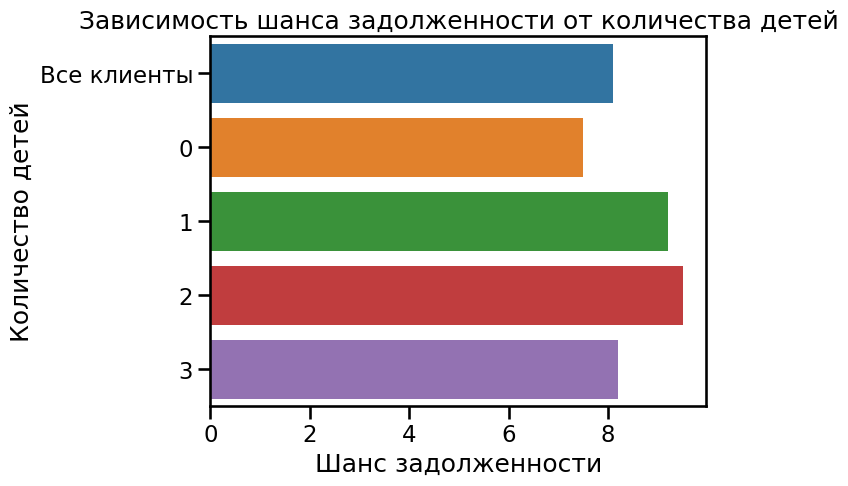

In [37]:
sns.barplot(y=debt_groupby_kids_table.drop(index=[4,5]).index, x=debt_groupby_kids_table['Шанс задолженности'].drop(index=[4,5]), orient='h').set_title("Зависимость шанса задолженности от количества детей"); #горизонтально для наглядности


Можем увидить что наличие детей негативно сказывается на шансе вернуть долг вовремя. Причём для 2х детей этот шанс чуть больше чем для одного.  Данные для 3х детей показывают падение, однако из-за малого количества клиентов в этой категории не следует считать это значение надёжным. Сравним всех бездетных клиентов со всеми клиентами с детьми чтобы составить более полную картину.

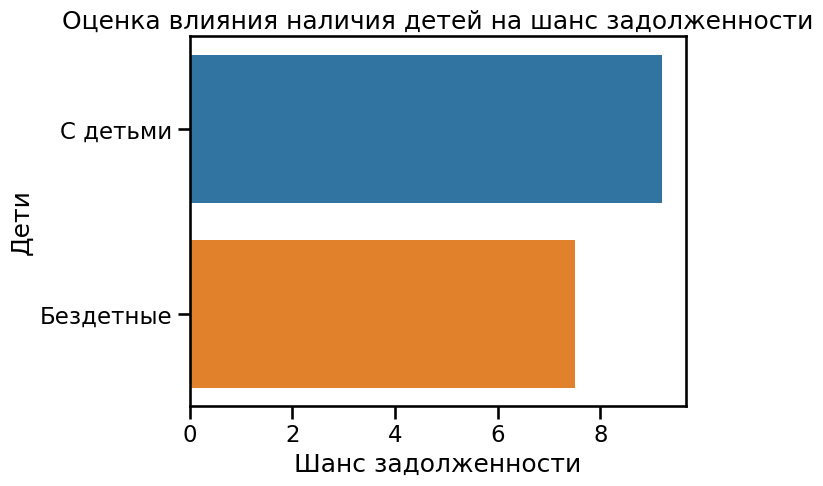

In [38]:
childless_debt_chance = data.loc[data['children'] == 0, 'debt'].mean()
children_debt_chance = data.loc[data['children'] != 0, 'debt'].mean()
children_debt = {}

children_debt_table = {'C детьми': round(children_debt_chance*100, 1)}
children_debt_table['Бездетные'] = round(childless_debt_chance*100, 1)
children_debt_table = pd.DataFrame.from_dict(children_debt_table, orient='index', columns=['Шанс задолженности'])
children_debt_table.index.name = "Дети" 
sns.barplot(y=children_debt_table.index, x=children_debt_table['Шанс задолженности'], orient='h').set_title("Оценка влияния наличия детей на шанс задолженности"); #развернём по горизонтали изза длинных имён категорий

In [39]:
print(f"В среднем шанс долга у клиентов {data['debt'].mean():.1%}. Для бездетных это значение ниже - {childless_debt_chance:.1%}")
print(f'В абсолютном отношении на {children_debt_chance - childless_debt_chance:.1%} больше семей с детьми имееют долги чем бездетные - {children_debt_chance:.1%}.')
print(f'Относительном бездетных это выражается в росте шанса на задолженность на {children_debt_chance/childless_debt_chance - 1 :.1%}')

В среднем шанс долга у клиентов 8.1%. Для бездетных это значение ниже - 7.5%
В абсолютном отношении на 1.7% больше семей с детьми имееют долги чем бездетные - 9.2%.
Относительном бездетных это выражается в росте шанса на задолженность на 22.5%


**Вывод:** 

Среди клиентов с детьми наблюдается значительно более высокий шанс иметь задолжность - на 1.7% (абсолютных) выше бездетных.

Данные о росте этого шанса с ростом количества детей сложно достоверно оценить:
1. Количество клиентов с тремя и более детьми более чем на порядок меньше чем количество клиентов с одним ребёнком, что ставит под сомнение репрезентативность выборки. Для их оценки имеет смысл использовать общий шанс задолженности клиентов с детьми.
2. Для у клиентов с 2мя детьми шанс на долг на 0.2% выше (в абсолютных значениях) по сравнению с клиентами с одним ребёнком, что говорит о возможном росте шанса на задолженность в зависимости от количества детей, однако невозможно делать уверенные выводи изза сравнительно небольшой разницы и отсутствия надёжных данных о семьях с 3мя и более детьми чтобы подтвердить или опровергнуть тенденцию.

В целом я считаю, что стоит учитывать наличие детей, как показатель риска задолженности, однако, непосредственно количеству детей не следует придавать большое значение пока нет возможности получить более репрезентативные данные.

### 3.2. <a id='toc3_2_'></a>[Есть ли зависимость между семейным положением и возвратом кредита в срок?](#toc0_)

Для начала рассмотрим столбец `family status` и `family_status_id` чтобы ознакомится с данными.

In [40]:
data['family_status'].unique() #проверить данные в столбце семейный положение

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [41]:
data['family_status_id'].unique() # проверить данные в столбце семейный положение ID

array([0, 1, 2, 3, 4], dtype=int64)

Будем работать со столбцом `family status` для более наглядного представления. Повторим алгоритм анализа по категориям применённый выше.

In [42]:
#составим сводную таблицу
family_status_debt_table = data['family_status'].value_counts() # рассмотрим количество записей в базе данных по семейному положению
family_status_debt_table = family_status_debt_table.to_frame(name = 'Количество клиентов') # Series -> DF

#Можно обойтись без данной переменной но код становится менее понятным
family_status_debt = data.groupby('family_status')['debt'].mean() # средний шанс задолженности по категории
family_status_debt = (family_status_debt*100).round(1) # переведём в проценты

family_status_debt_table['Шанс задолженности'] = family_status_debt
family_status_debt_table = client_totals.append(family_status_debt_table)
family_status_debt_table.index.name = "Семейное Положение" 
family_status_debt_table


,Количество клиентов,Шанс задолженности
Семейное Положение,,
Все клиенты,21331,8.1
женат / замужем,12261,7.6
гражданский брак,4134,9.3
Не женат / не замужем,2796,9.8
в разводе,1189,7.1
вдовец / вдова,951,6.6


Записей достаточно для анализа по всем категориям. Рассмотрим шанс задолженности на графике.

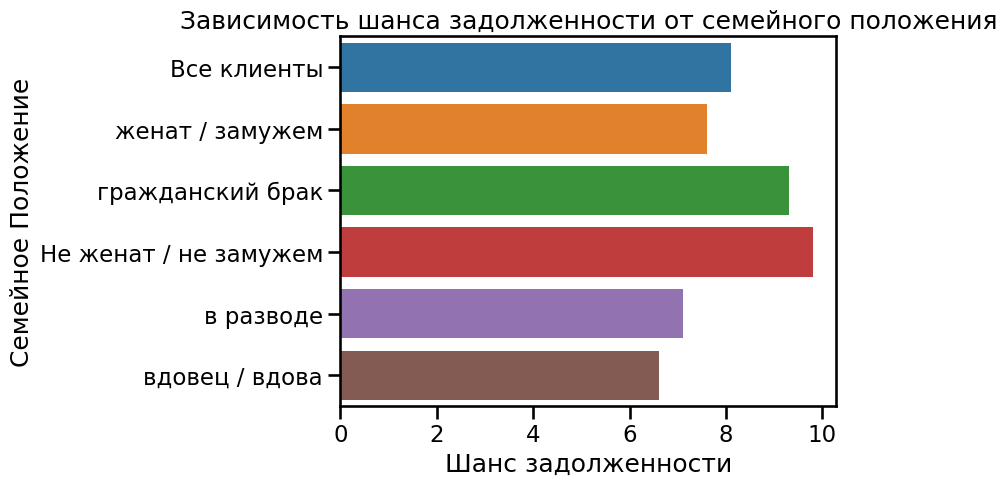

In [43]:
sns.barplot(y=family_status_debt_table.index, x=family_status_debt_table['Шанс задолженности'], orient='h').set_title("Зависимость шанса задолженности от семейного положения"); #развернём по горизонтали изза длинных имён категорий


In [44]:
for row in range(len(family_status_debt)):
    if family_status_debt[row] == debt_mean:
        continue 
    elif family_status_debt[row] < debt_mean:
        print(f"Для {family_status_debt.index[row]} шанс задолженности ниже среднего на {round(debt_mean-family_status_debt[row], 1)}%")
    elif family_status_debt[row] > debt_mean:
        print(f"Для {family_status_debt.index[row]} шанс задолженности выше среднего на {round(family_status_debt[row]-debt_mean, 1)}%")


Для Не женат / не замужем шанс задолженности выше среднего на 1.7%
Для в разводе шанс задолженности ниже среднего на 1.0%
Для вдовец / вдова шанс задолженности ниже среднего на 1.5%
Для гражданский брак шанс задолженности выше среднего на 1.2%
Для женат / замужем шанс задолженности ниже среднего на 0.5%


Рассмотрим отдельно, есть ли значимая разница между клиентами состоящими в официальном браке и теми, кто принадлежит остальным категориям.

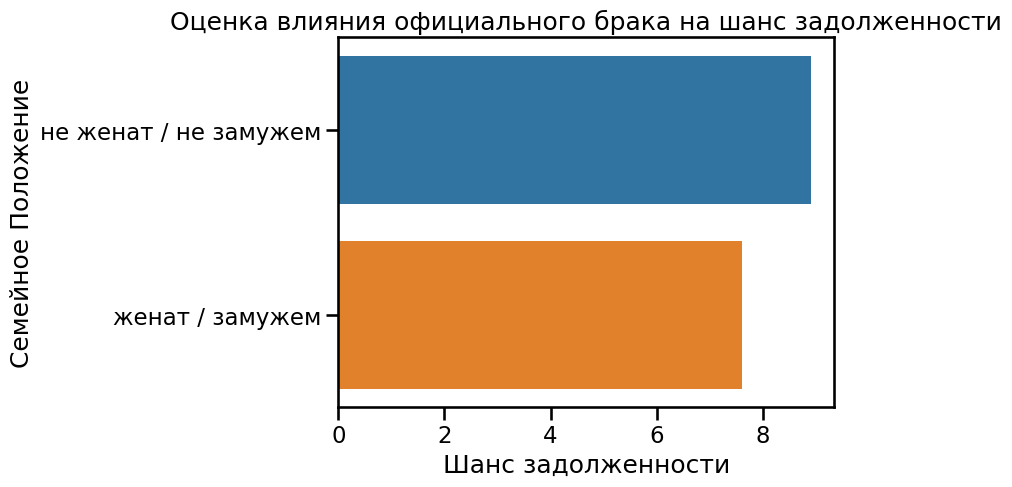

In [45]:
is_married = {'не женат / не замужем': round(data.loc[(data['family_status'] != 'женат / замужем'), 'debt'].mean()*100, 1)}
is_married['женат / замужем'] = family_status_debt_table.loc['женат / замужем', 'Шанс задолженности']
is_married = pd.DataFrame.from_dict(is_married, orient='index', columns=['Шанс задолженности'])
is_married.index.name = "Семейное Положение" 
sns.barplot(y=is_married.index, x=is_married['Шанс задолженности'], orient='h').set_title("Оценка влияния официального брака на шанс задолженности"); #развернём по горизонтали изза длинных имён категорий

In [53]:
print(f"В целом шанс задолженности клиентов в официальном браке на" +
       f" {round(is_married.loc['не женат / не замужем', 'Шанс задолженности'] - is_married.loc['женат / замужем', 'Шанс задолженности'], 1)}% ниже остальных")

В целом шанс задолженности клиентов в официальном браке на 1.3% ниже остальных


**Вывод:** 

Шанс задолженности для состоящих в гражданском браке и не женатых(не замужних) значительно выше среднего, для разведенных и вдов(вдовцов), наоборот, значительно ниже. Для находящихся в браке шанс ниже среднего, но менее значительно - только на 0.6%(абс). 

Однако если мы сравним находящихся в официальном браке, с остальными клиентами, их шанс задолженности на 1.3%(абс) ниже остальных.

### 3.3. <a id='toc3_3_'></a>[Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#toc0_)

Для анализа будем использовать следующие категории:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

В добавок построим график для наглядного отображения шанса на задолженность клиентов с уровнем дохода близким (+/- 10000) определённому.

In [54]:
#составим сводную таблицу
income_category_debt_table = data.groupby('total_income_category')['total_income_category'].count() # рассмотрим количество записей в базе данных по семейному положению
income_category_debt_table = income_category_debt_table.to_frame(name = 'Количество клиентов') # Series -> DF

#Можно обойтись без данной переменной но код становится менее понятным
income_category_debt = data.groupby('total_income_category')['debt'].mean() # средний шанс задолженности по категории
income_category_debt = (income_category_debt*100).round(1) # переведём в проценты

income_category_debt_table['Шанс задолженности'] = income_category_debt
income_category_debt_table = client_totals.append(income_category_debt_table)
income_category_debt_table.index.name = "Категория дохода" 
income_category_debt_table


,Количество клиентов,Шанс задолженности
Категория дохода,,
Все клиенты,21331,8.1
A,25,8.0
B,5014,7.1
C,15921,8.5
D,349,6.0
E,22,9.1


Данных для E, A - недостаточно, отбросим их. Для D мало информации, учтём это в дальнейшем анализе. Построим график для того чтобы более наглядно сравнить категории.

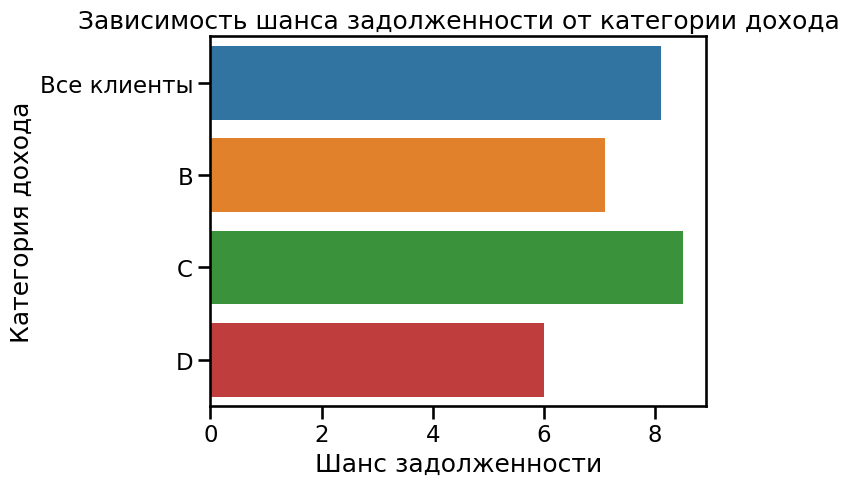

In [55]:

sns.barplot(y=income_category_debt_table['Шанс задолженности'].drop(['A','E']).index, x=income_category_debt_table.drop(['A','E'])['Шанс задолженности'], orient='h').set_title("Зависимость шанса задолженности от категории дохода"); #горизонтально для наглядности

Для категорий C и B можно говорить о том что клиенты с высоким доходом в целом более надёжны чем клиенты со средним доходом. Учитывая маленькое количество значений в категории D, сложно говорить о ней с уверенностью, но можно предположить что клиенты с низким доходом более обеспокоены невозвратом долгов и как следует стремятся вернуть ввовремя. Следует провести дальнейшие исследования дабы убедится в этой гипотезе, или опровергнуть её.


Для того чтобы более широко оценить зависимость платежеспособности от дохода клиента, построим график зависимости задолженности от уровня дохода: для каждой тысячи единиц дохода возьмём диапазон клиентов, чей доход на l0000 больше или меньше данного значения, и сначала оценим количество клиентво на этом диапазоне, а потом посчитаем среднее значение задолженности для них. Учитывая малое количество записей категорий A и Е ограничимся доходом от 30 тысяч до миллиона.

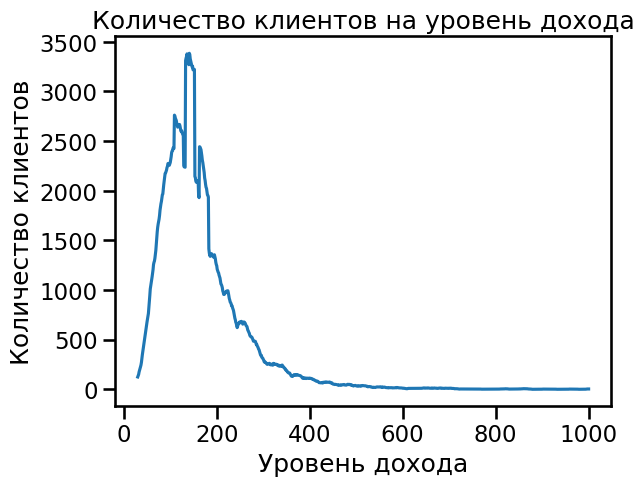

In [56]:

debt_income_count = []
income_range = range(30, 1001)
income_range = pd.Series(income_range, name="Уровень дохода")

for i in range(30, 1001):
    debt_values = data.loc[(data['total_income'] < i*1000 + 10000) & (data['total_income'] > i*1000 - 10000), 'debt'].count() 
    debt_income_count.append(debt_values)
    
debt_income_count = pd.Series(debt_income_count, name="Количество клиентов")
sns.lineplot(x=income_range, y=debt_income_count).set_title("Количество клиентов на уровень дохода");

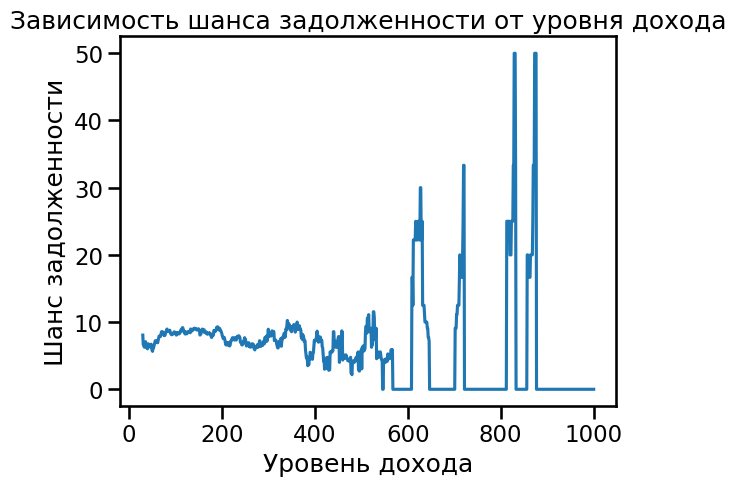

In [57]:
debt_income_mean = []
income_range = range(30, 1001)
income_range = pd.Series(income_range, name="Уровень дохода")

for i in range(30, 1001):
    debt_values = data.loc[(data['total_income'] < i*1000 + 10000) & (data['total_income'] > i*1000 - 10000), 'debt'].mean()
    debt_values = debt_values*100 #проценты
    debt_income_mean.append(debt_values)
    
debt_income_mean = pd.Series(debt_income_mean, name="Шанс задолженности")
sns.lineplot(x=income_range, y=debt_income_mean).set_title("Зависимость шанса задолженности от уровня дохода");

Из графиков можно еще раз убуедится что видно что клиентво категории D очень мало, а так же заметить что клиенты категории B сильно варьируются в доходе между собой, хотя большинство сконцентрировано блтзко с катеорией C. Следствием этого является крайняя ненадёжность оценок на маленьких промежутках используемых в графике после дохода около 550. Для того чтобы более точно уловить общие тенденции разобъем клиентов на 5 категорий дохода, равных по количеству клиентов и оценим шанс задолженности для каждой из них.

In [58]:
income_qcut = data.loc[:, ['debt', 'total_income']]
income_qcut['qcut'] = pd.qcut(data['total_income'], 5, precision=0)

income_qcut_debt = income_qcut.groupby('qcut')['debt'].mean() # среднее шанс задолженности
income_qcut_debt = (income_qcut_debt*100).round(1) # переведём в проценты
income_qcut_debt = client_totals['Шанс задолженности'].append(income_qcut_debt)
income_qcut_debt.index.name = 'Количественные категории'
income_qcut_debt.name = "Шанс задолженности"

income_qcut_debt.to_frame()

,Шанс задолженности
Количественные категории,
Все клиенты,8.1
"(20666.0, 98514.0]",8.1
"(98514.0, 132113.0]",8.4
"(132113.0, 161380.0]",8.7
"(161380.0, 214604.0]",8.4
"(214604.0, 2265604.0]",7.0


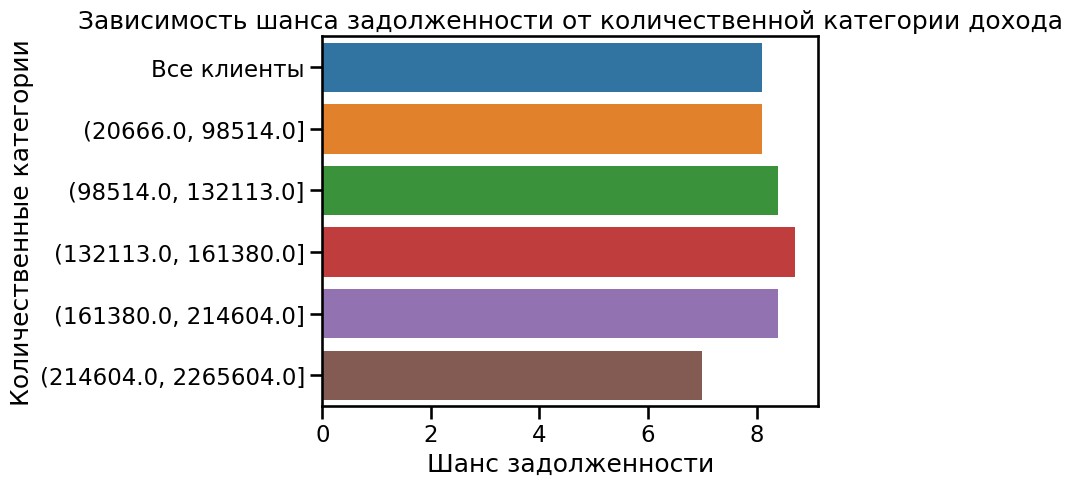

In [59]:

sns.barplot(y=income_qcut_debt.index, x=income_qcut_debt, orient='h').set_title("Зависимость шанса задолженности от количественной категории дохода"); #горизонтально для наглядности

**Вывод:** 

Если брать для  анализа платежеспособности предлагаемые категории, то возникает серьёзная проблема с качеством оценки вызванная малым количеством клиентов в 3х категориях. A и E не пригодны для анализа, и я бы избегал делать какие либо оценки на их основе, в случае если нужно предсказать платежеспособности клиентов в этих категориях стоит либо их расширить, либо использовать данные других категорий, либо положиться на общие тенденции. Категория D представляет особенный интерес так как имеет очень низкий шанс задолженности, однако маленькое количество клиентов в ней ставит эту оценку под сомнение. Категории B и C наиболее пригодны для анализа и в целом говорят нам о том что люди со средним доходом, как правило, менее платежеспособны чем люди с высоким доходом.

Дальнейший анализ позволил выявить чуть более точнуу оценку происходящего - шанс задолженности клиентов с относительно низкими доходами совпадает со средм для всех клиентов, после чего растёт и достигает максимума для клиентов со средними доходами, и падает до своего минимума для наиболее обеспеченных. Таким образом наиболее надёжными клиентами выступают люди с самым высоким уровнем дохода, наимение надёжными со средним. Можно предположить что люди с низкими доходами более тщательно избегают долгов и как следствие более надёжны чем клиенты со средним доходом.

### 3.4. <a id='toc3_4_'></a>[Как разные цели кредита влияют на его возврат в срок?](#toc0_)

Рассмотрим отношение между шансом возврата и категориями кредитования.

In [60]:
data.groupby('purpose_category')['purpose_category'].count() #убедимся что у нас достаточно данных чтобы делать выводы

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [61]:
#составим сводную таблицу
purpose_category_debt_table = data['purpose_category'].value_counts() # рассмотрим количество записей в базе данных по семейному положению
purpose_category_debt_table = purpose_category_debt_table.to_frame(name = 'Количество клиентов') # Series -> DF

#Можно обойтись без данной переменной но код становится менее понятным
purpose_category_debt = data.groupby('purpose_category')['debt'].mean() # средний шанс задолженности по категории
purpose_category_debt = (purpose_category_debt*100).round(1) # переведём в проценты

purpose_category_debt_table['Шанс задолженности'] = purpose_category_debt
purpose_category_debt_table = client_totals.append(purpose_category_debt_table)
purpose_category_debt_table.index.name = "Категория дохода" 
purpose_category_debt_table


,Количество клиентов,Шанс задолженности
Категория дохода,,
Все клиенты,21331,8.1
операции с недвижимостью,10751,7.3
операции с автомобилем,4279,9.3
получение образования,3988,9.3
проведение свадьбы,2313,7.9


Для всех категорий у нас достаточно данных чтобы давать оценку. Сравним среднее значение шанса на задолженность с шансом для каждой категори.

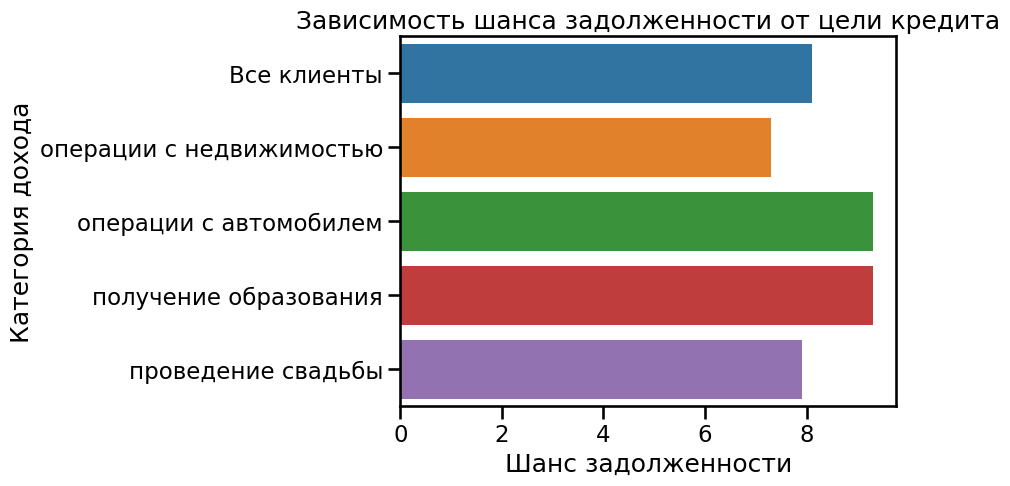

In [62]:

sns.barplot(y=purpose_category_debt_table['Шанс задолженности'].index, x=purpose_category_debt_table['Шанс задолженности'], orient='h').set_title("Зависимость шанса задолженности от цели кредита"); #горизонтально для наглядности

**Вывод:** 
Шансы на задолженность значительно выше для автомобилистов и студентов. Совпадает со средним для людей стремящихся провести свадьбу. И значительно занижен для людей проводящих операции с недвижимостью.

### 3.5. <a id='toc3_5_'></a>[Приведите возможные причины появления пропусков в исходных данных.](#toc0_)

Еще раз прочитаем начальные данные дабы рассмотреть их, сохраним их в переменную `data_unchanged`.

In [63]:
import pandas as pd

try:
    data_unchanged = pd.read_csv('/datasets/data.csv')
except:
    data_unchanged = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [64]:
data_unchanged.isna().sum().dropna() #количество пропущенных значений для каждого столбца

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [65]:
data_unchanged[data_unchanged['total_income'].isna()].head(30) #рассмоитрим первые 20 пропусков по столбику `total_income`

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Все пропуски присутствуют одновременно в столюцах `days_employed` и `total_income`. Убедимся, что это верно для остальной таблицы.

In [66]:
len(data_unchanged[(data_unchanged['total_income'].isna()) & (data_unchanged['days_employed'].isna())])

2174

Это значение совпадает с количествоп пропусков в обоих столбцах, подтверждая предположение. Далее, похоже что все пропуски принадлежат узкому перечню с точки зрения источника дохода. Рассмотрим это поближе.


In [67]:
data_unchanged['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [68]:
data_unchanged[(data_unchanged['total_income'].isna()) &\
               ((data_unchanged['income_type'] != 'госслужащий') & (data_unchanged['income_type'] != 'сотрудник') & \
                (data_unchanged['income_type'] != 'пенсионер') & (data_unchanged['income_type'] != 'компаньон'))].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости


Замечен один пропуск клиента - предпринимателя, рассмотрим данную категорию клиентов поближе.

In [69]:
data_unchanged[data_unchanged['income_type'] == 'предприниматель'].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
18697,0,-520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


В данной категории всего 2 клиента, этого недостаточно для каких - либо выводов.

*Ответ:* 
Можно заметить что пропуска всегда присутствуют в категориях стаж и общий доход, что говорит об отсутствии данных о трудоустройстве клиента. Все пропуска кроме 1 принадлежат категориям госслужащий, компаньон, сотрудник, пенсионер. Пропуск-исключение сложно оценить т.к. из всех клиентов всего 2 предприниматели. В целом же, пропуски, скорее всего, результат отказа клиентов предоставить данные о своём трудоустройстве и доходе, можно предположить что в большинстве случаев - это отказ предоставить трудовую книжку.

### 3.6. <a id='toc3_6_'></a>[Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.](#toc0_)

*Ответ:*

В рамках поставленной задачи количественные переменные полезны для построения общих представлений о разных категориях клиентов, отбрасывание строк из таблицы из-за пропусков может пагубно сказаться на репрезентативности такого анализа. Делая выбор чем заполнить пропуски, мы выбираем медианные значения потому что они более вероятно отражают среднего клиента нежели матиматические средние, которые подвержены искажению в случае присутствия очень больших и очень маленьких значений.

## 4. <a id='toc4_'></a>[Общий вывод.](#toc0_)


В целом анализ категорий клиентов показал что на кредитоспособность влияет ряд факторов, однако большинство отклонений от среднего показателя находится в рамках 1%, поэтому следует не ориентироваться на какой-то один показатель, а использовать модель оценки клиента которая берёт в учёт несколько факторов. 


Из анализируемых категорий наиболее примечательным оказались клиенты с уровнем дохода категории D1 (30001-60000) которые показали кредитоспособность на 2% лучше средней. Возможно имеет смысл привлечь больше клиентов этой категории дохода, дабы улучшить средние показатели.

Целью проекта было исследование надёжности заёмщиков для дальнейшего построения модели кредитного скоринга. Заказчиком были предоставлены обезличенные данные клиентов содержащие уровень дохода, наличие задолженности, а так же ряд данных о клиенте, которые позволяют произвести анализ для выявления закономерностей зависимости шанса задолженности от особенностей клиента. В данных обнаружился ряд пропусков информации о стаже и доходе клиентов. Дабы избежать искажения выборки, пропуска восстановили, заполнив медианным значением для каждого источника доходов клиентов с пропусками. 

Анализ показал что клиенты без детей более кредитоспособны чем клиенты с детьми. Ситуация аналогична при сравниваем клиентов состоящих в официальном браке с остальными клиентами. Однако стоит учесть, что разведённые клиенты и клиенты потерявшие супруга(у) показывают еще более высокую платежеспособность чем женатые. 

Что касается влияния уровня дохода на шанс зависимости - наиболее надёжными показали себя клиенты с высоким доходом, кредитоспособность клиентов с низким доходом средняя, и наиболее часто задолжниками становятся клиенты со средним доходом. Обращаю внимание на то что данные говорят о возможном высоком уровне надёжности клиентов с доходом значительно ниже среднего, однако говорить с уверенностью сложно из-за маленького объёма данных о них. 

Среди причин кредита наиболее часто задолженность возникает у людей стремящихся, с помощью кредита, получить образование или приобрести автомобиль. Заёмщики же планирующие свадьбы и приобретающие недвижимость наоборот показывают платежеспособность выше средней.

В целом анализ категорий клиентов показал что на кредитоспособность влияет ряд факторов, однако отклонений по отдельно взятым факторам малы, поэтому следует использовать модель оценки кредитоспособности, клиента которая берёт в учёт несколько показателей. 

В сборе данных для дальнейших исследований следует обратить внимание на устранение пропусков, для этого минимизировать человеческий и технический факторы которые могли повлиять на данные с одной стороны, и, если это возможно, привлечь тех клиентов о которых недостаточно данных, передать данные банку.

Так же хотел бы обратить внимание на категории дохода используемые банком для анализа кредитоспособности - данные по трём из пяти категорий не достаточны для достоверной оценки, имеет смысл либо попытаться собрать данные большем количестве клиентов из мало представленных категорий, либо пересмотреть категории для более надёжного анализа.


